# Introduction to Quantum Programming

In [2]:
############### Needed imports list ##################
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as plt
from qiskit.tools.visualization import *
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
from PIL import Image
from qiskit.quantum_info import Statevector

Here is a simple quality of life function I use throughout the program to run the circuits.

In [3]:
def work(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    return result.get_counts(qc), result.get_statevector(qc)

## 1. 4 Random Bytes

In this section we will use utilize one of the quantum bits' most important features, the ability to generate truly random numbers. In this case our aim will be to generate 4 random bytes of information. First, we will need to generate 1 random quantum bit, to do this we must first define the quantum bit:

In [4]:
bit_q = QuantumRegister(1, name='bitq')

This is our quantum bit named bitq which is how it will appear in our diagrams. Next in order to read this bit we will also need a normal digital bit so that we are able to measure bitq and lock it into an absolute state of either 0 or 1. 

In [5]:
bit_d = ClassicalRegister(1, name='bitd')

Now we must define our circuit, this is the environment where all of our operations will take place. 

In [6]:
qc = QuantumCircuit(bit_q, bit_d)

Then we will use reset on bitq in order to write the value of |0> into all of the bits so they all have the same starting point.

In [7]:
qc.reset(bit_q) 

Next we begin to actually manipulate the bits, as we are only interested in generating random values at this point will we use the HAD operation which places the quantum bits into an equal superposition of 0 and 1 meaning there is a 50/50 chance of the value of the bit being read as either 0 or 1, once the value of the bit is read it cannot be changed.

In [8]:
qc.h(bit_q)

Now we perform the last operation on this circuit which is to read the results of the quantum bit as a digital bit.

In [9]:
qc.measure(bit_q, bit_d)


And finally we run the circuits and get the results.

In [10]:
results = work(qc)
counts = results[0]
print('Your random bit is: {0}'.format(list(counts.keys())[0]))
qc.draw(output='text')

Your random bit is: 1


┌───┐┌─┐
bitq_0: ─|0>─┤ H ├┤M├
             └───┘└╥┘
bitd: 1/═══════════╩═
                   0

If you run the above a few times you will see that the value of the random bit changes hence we have succeeded in the first part of our task. Below the results you can see a small diagram of our circuit to help with visualisation (just remove the line qc.darw() if you don't what to see the diagram in future sections). 

Now onto generating our 4 random bytes of information.

In [11]:
for i in range(0, 4):
    bit_q = QuantumRegister(8, name='bitq')
    bit_d = ClassicalRegister(8, name='bitd')
    qc = QuantumCircuit(bit_q, bit_d)
    qc.reset(bit_q)
    qc.h(bit_q) 
    qc.measure(bit_q, bit_d) 
    results = work(qc)
    counts = results[0]
    print('Your random byte is: {0}'.format(list(counts.keys())[0]))
qc.draw()

Your random byte is: 10010101
Your random byte is: 10100001
Your random byte is: 10100111
Your random byte is: 11100010


┌───┐┌─┐                     
bitq_0: ─|0>─┤ H ├┤M├─────────────────────
             ├───┤└╥┘┌─┐                  
bitq_1: ─|0>─┤ H ├─╫─┤M├──────────────────
             ├───┤ ║ └╥┘┌─┐               
bitq_2: ─|0>─┤ H ├─╫──╫─┤M├───────────────
             ├───┤ ║  ║ └╥┘┌─┐            
bitq_3: ─|0>─┤ H ├─╫──╫──╫─┤M├────────────
             ├───┤ ║  ║  ║ └╥┘┌─┐         
bitq_4: ─|0>─┤ H ├─╫──╫──╫──╫─┤M├─────────
             ├───┤ ║  ║  ║  ║ └╥┘┌─┐      
bitq_5: ─|0>─┤ H ├─╫──╫──╫──╫──╫─┤M├──────
             ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐   
bitq_6: ─|0>─┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───
             ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
bitq_7: ─|0>─┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├
             └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
bitd: 8/═══════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

Hopefully you can see what's going on here, instead of 1 bit we are working with 8 i.e. a byte and the whole process is wrapped in a for loop so that we can generate 4 of them.

## 2. Creating the NOT Function


In this section we will recreate the NOT function found in conventional logic, however before that, some needed background information: When the HAD operation is performed on a qubit with a value of |1> its relative phase gets rotated 180 degrees, and the HAD function is that it is its own inverse, therefore performing it twice will reverse its effect. 

To create and demonstrate the NOT function we start by making circuit of 2 qubits and have them both be |0> by default the 1st bit will be our control bit which will remain at 0 and the 2nd will be our test bit.

In [12]:
bit_q = QuantumRegister(2, name='bitq')
bit_d = ClassicalRegister(2, name='bitd')
qc = QuantumCircuit(bit_q, bit_d)
qc.reset(bit_q)
qc.measure(bit_q[0], bit_d[0])

Next, we target the 2nd qubit and perform HAD to place it in a state of equal superposition, then manually rotate the qubit $\pi$ radians and reverse the HAD by performing it again. 

In [13]:
qc.h(bit_q[1])
qc.rz(math.radians(180), bit_q[1])
qc.h(bit_q[1])

Finally, we read the 2nd qubit, and make a plot to visualize the change.

             ┌─┐                       
bitq_0: ─|0>─┤M├───────────────────────
             └╥┘┌───┐┌────────┐┌───┐┌─┐
bitq_1: ─|0>──╫─┤ H ├┤ RZ(pi) ├┤ H ├┤M├
              ║ └───┘└────────┘└───┘└╥┘
bitd: 2/══════╩══════════════════════╩═
              0                      1 


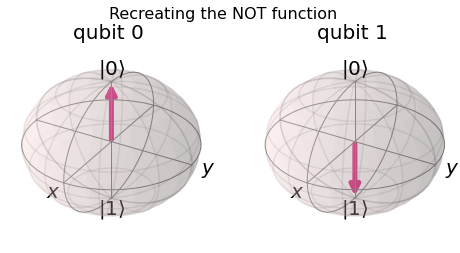

In [14]:
qc.measure(bit_q[1], bit_d[1])
results = work(qc)
print(qc.draw(output='text'))
plot_bloch_multivector(results[1], 'Recreating the NOT function')

Excellent so we know it works now we can put it into an easy to access function incase we want to use it later.

In [15]:
def NOT(qc, bits):
    qc.h(bits)
    qc.rz(math.radians(180), bits)
    qc.h(bits)

As this is essentially just a series of circuit instructions we are calling there is no need to return anything, however, you can do so if you wish.

## 3. Root-of-not 

The root-of-not is defined as a function which when applied twice results in a not operation, taking what we found out
earlier creating the not function we can see that all we need to do to get this root of not function is to perform 1/2
of the operation e.g.  only changing the phase by 90 degrees at a time. Here I will use 3 qubits to better illustrate what
is happening at each stage of the process.


In [16]:
bit_q = QuantumRegister(3, name='bitq')
bit_d = ClassicalRegister(2, name='bitd')
qc = QuantumCircuit(bit_q, bit_d)
qc.reset(bit_q)

Next, in order to simply the operations I will adapt the NOT function we created earlier to add in the functionality of root-NOT. 

In [17]:
def NOT(qc, bits, arg='not'):
    qc.h(bits)
    if arg.lower() == 'root':
        qc.rz(math.radians(90), bits)
    else:
        qc.rz(math.radians(180), bits)
    qc.h(bits)

As you can see the only thing changed is the ability to specify the 'root' argument which only performs 'half' the NOT operation.

Now we will keep the control bit as is, perform root-NOT once on the 2nd bit and twice on the 3rd bit, then see the effects.

             ┌─┐                                               
bitq_0: ─|0>─┤M├───────────────────────────────────────────────
             └╥┘┌───┐┌──────────┐┌───┐                         
bitq_1: ─|0>──╫─┤ H ├┤ RZ(pi/2) ├┤ H ├─────────────────────────
              ║ ├───┤├──────────┤├───┤┌───┐┌──────────┐┌───┐┌─┐
bitq_2: ─|0>──╫─┤ H ├┤ RZ(pi/2) ├┤ H ├┤ H ├┤ RZ(pi/2) ├┤ H ├┤M├
              ║ └───┘└──────────┘└───┘└───┘└──────────┘└───┘└╥┘
bitd: 2/══════╩══════════════════════════════════════════════╩═
              0                                              1 


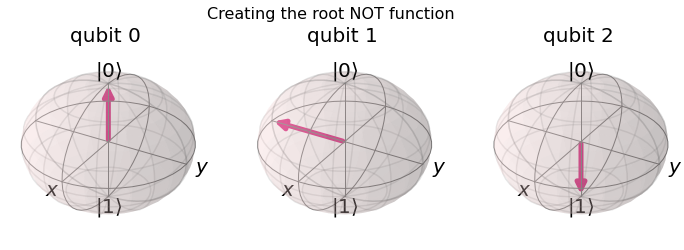

In [18]:
qc.measure(bit_q[0], bit_d[0])
NOT(qc, bit_q[1], 'root')
NOT(qc, bit_q[2], 'root')
NOT(qc, bit_q[2], 'root')
qc.measure(bit_q[2], bit_d[1])
results = work(qc)
print(qc.draw())
plot_bloch_multivector(results[1], 'Creating the root NOT function')

Notice I did not the measure the 2nd qubit and force it into a digital bit 1/0 state, this was so that I could show the interesting in-between state that occurs in the bit after performing 1 of the root-NOT operations. 

## 4. Basic Encryption

Next, we are going to look more in depth at one of the most frequently utilised aspects of quantum programming, encryption.

In [19]:
jim = QuantumRegister(1, name='jim')
tim = QuantumRegister(1, name='tim')
transmission1 = QuantumRegister(1, name='authentic transmission')
jim_info = ClassicalRegister(1, name='jinfo')
tim_info = ClassicalRegister(1, name='tinfo')

In this scenario Jim is trying to send classified information to Tim, however, a spy is trying to intercept said information. 

To begin with Jim and Tim will transmit a single bit to each other to check they can correctly facilitate uninterrupted transmission, the spy is not interested in this information so is not on the network.

In [20]:
qc = QuantumCircuit(jim, transmission1, tim, jim_info, tim_info)

To begin with Jim will generate a random bit using the HAD operation and measure it, then he will utilise a controlled NOT gate to make sure his transmission is the same as his actual data. The controlled NOT gate performs the NOT operation on a bit if the test bit is 1. In this case if Jim generates a 0 *transmission1* will remain at 0, but if he generates a 1 the NOT operation will be performed on *transmission1* to change it to a 1.  

In [21]:
qc.h(jim)
qc.measure(jim, jim_info)
qc.cx(jim, transmission1)

For basic encryption Tim will use the HAD operation.

In [22]:
qc.h(transmission1)

Finally, they transmit the information over to Tim, he decrypts the information using another HAD operation, as remember it is its own inverse, and reads the information.

In [23]:
qc.swap(tim, transmission1)
qc.h(tim)
qc.measure(tim, tim_info)

In [24]:
counts = work(qc)[0]
caught = False
for key,val in counts.items():
    jinfo, tinfo = (int(x) for x in key.split(' '))
    if jinfo == tinfo:
        print('Jim received: {0}\nTim received: {1}'.format(jinfo, tinfo))
        print('Information sucessfully received!')

Jim received: 1
Tim received: 1
Information sucessfully received!


Once they run the circuit and check the results, they can see they were successful and try the classified information. 

This time the spy is interested and attempts to intercept.

In [25]:
jim = QuantumRegister(1, name='jim')
spy = QuantumRegister(1, name='spy')
tim = QuantumRegister(1, name='tim')
transmission1 = QuantumRegister(1, name='authentic transmission')
transmission2 = QuantumRegister(1, name='pirate transmission')
jim_info = ClassicalRegister(1, name='jinfo')
spy_info = ClassicalRegister(1, name='sinfo')
tim_info = ClassicalRegister(1, name='tinfo')
spying = True

if spying:
    qc = QuantumCircuit(jim, transmission1, spy, transmission2, tim, jim_info, spy_info, tim_info)
else:
    qc = QuantumCircuit(jim, transmission1, tim, jim_info, tim_info)

qc.h(jim)
qc.measure(jim, jim_info)

qc.cx(jim, transmission1)
qc.h(transmission1)

The spy intercepts *transmission1* and reads the information, locking the qubit into whatever position they read it as, they then generate a new qubit with the value they read and send it off to Tim. 

In [26]:
if spying:
    qc.swap(transmission1, spy)
    qc.measure(spy, spy_info)
    qc.cx(spy, transmission2)
    qc.swap(transmission2, tim)
else:
    qc.swap(tim, transmission1)

Upon receipt of this qubit Tim uses HAD to decrypt the qubit which he believes is in a state of equal superposition, however, in truth he has just put the spy's qubit into said state so when he measures it there is a 50/50 chance it's the same as the one Jim sent.

In [27]:
qc.h(tim)
qc.measure(tim, tim_info)

Here we can see the benefits of quantum encryption: firstly, the spy only has a chance of 0.5 of getting the correct information from Jim's transmission, secondly Tim has a 0.5 probability of finding that his data doesn't match the data that was sent and therefore realise that there is a spy. In total there is only a probability of 0.25 that the spy manages to intercept the correct data and get away undetected. 

In [28]:
counts = work(qc)[0]
caught = False
for key,val in counts.items():
    if spying:
        jinfo, sinfo, tinfo = (str(x) for x in key.split(' '))
        print('Jim received: {0}\nSpy received: {1}\nTim received: {2}'.format(jinfo, sinfo, tinfo))
        if jinfo != tinfo:
            print('Spy detected!')
            caught = True
        elif jinfo != sinfo and jinfo == tinfo:
            print('Spy was not detected but received faulty information!')
            caught = True
        if not caught:
            print('Failure! Spy secretly received information!.')
    else:
        jinfo, tinfo = (int(x) for x in key.split(' '))
        if jinfo == tinfo:
            print('Jim received: {0}\nTim received: {1}'.format(jinfo, tinfo))
            print('Information succesfully received!')
print(qc.draw())

Jim received: 1
Spy received: 0
Tim received: 1
Spy was not detected but received faulty information!
                          ┌───┐┌─┐                                
                   jim_0: ┤ H ├┤M├──■─────────────────────────────
                          └───┘└╥┘┌─┴─┐┌───┐                      
authentic transmission_0: ──────╫─┤ X ├┤ H ├─X────────────────────
                                ║ └───┘└───┘ │ ┌─┐                
                   spy_0: ──────╫────────────X─┤M├──■─────────────
                                ║              └╥┘┌─┴─┐           
   pirate transmission_0: ──────╫───────────────╫─┤ X ├─X─────────
                                ║               ║ └───┘ │ ┌───┐┌─┐
                   tim_0: ──────╫───────────────╫───────X─┤ H ├┤M├
                                ║               ║         └───┘└╥┘
                 jinfo: 1/══════╩═══════════════╬═══════════════╬═
                                0               ║               ║ 
                           

Now you might say that a 0.25 chance of escaping undetected is too high, however, bear in mind that this is 0.25 per bit meaning that if you were transmitting a 3KB text file for example, the probability of the spy perfectly intercepting information and getting away would be 0.25<sup>24576</sup> which is essentially 0.

## 5. Phase Kickback

Next is a feature which will become more useful later on. Previously we have used controlled NOT (CNOT) gates which performed the NOT operation on a qubit provided the conditional qubit was equal to 1, now we will use the CPHASE gate. The CPHASE gate shifts the phase of a qubit provided the control qubit is equal to 1. 

         ┌───┐              
shift_0: ┤ H ├─■────────────
         ├───┤ │            
shift_1: ┤ H ├─┼──────■─────
         ├───┤ │pi/4  │pi/2 
  one_0: ┤ X ├─■──────■─────
         └───┘              


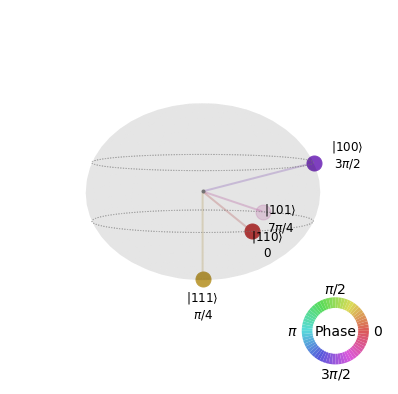

In [29]:
shift = QuantumRegister(2, name='shift')
one = QuantumRegister(1, name='one')
qc = QuantumCircuit(shift, one)

qc.x(one)
qc.h(shift)
qc.cu1(math.pi/4, shift[0], one)
qc.cu1(math.pi/2, shift[1], one)

result = work(qc)
print(qc.draw())
plot_state_qsphere(result[1], show_state_phases=True)

The code above performs a fairly simple operation, it creates the 2 qubit register *shift* and the 1 qubit register *one*. *one* is then set 1 and *shift* is placed in a state of equal superposition meaning it is equally likely to represent any of 4 values (0: 00, 1:01, 2:10, 3:11). You'll notice something strange here though, *shift* is acting as our control bit while as *one* is our target, however, *shift* is the one having its phase rotation changed. Not just this though the phase changes affecting *shift* is a combination of the 2 CPHASE operations we are performing despite the fact we applied them to separate bits. For example 00 starts off with a rotation of 3$\pi$/2, next up 01 should have a rotation of 3$\pi$/2 + $\pi$/4 which it does: 7$\pi$/4, next 10 which should have a rotation of 3$\pi$/2 + $\pi$/2 which it does: 0. Finally, we should have 11 also have a rotation of just 0 as the only the 2nd qubit which would be the 'highest' or 1st digit in a binary representation should be affected, however, we can see that even though the instruction was not specifically issued to the 2nd qubit its rotation is equal to 3$\pi$/2 + $\pi$/2 + $\pi$/4. The effects seen here are due to a combination of the entanglement of the 2 qubits and phase kickback. 

## 6. The SWAP Test
The SWAP test is used to ascertain whether 2 qubits hold equal values without reading them, as we know reading a qubit locks it in a certain state. I will do my best to explain why this test works, however, to do so accurately would require use of the mathematics I am trying to abstract, I would recommend researching this test in more detail if you are interested. To begin with I will introduce the CSWAP gate which is the most important aspect of this test. As you may be able to guess a CSWAP gate is one which swaps the value of 2 qubits provided the test bit is equal to 1.

In [67]:
example1 = QuantumRegister(1, name='example1')
example2 = QuantumRegister(1, name='example2')
control = QuantumRegister(1, name='control')
qc = QuantumCircuit(example1, example2, control)
qc.cswap(control, example1, example2)
qc.barrier()
qc.ccx(control, example1, example2)
qc.ccx(control, example2, example1)
qc.ccx(control, example1, example2)
print(qc.draw())

                ░      ┌───┐     
example1_0: ─X──░───■──┤ X ├──■──
             │  ░ ┌─┴─┐└─┬─┘┌─┴─┐
example2_0: ─X──░─┤ X ├──■──┤ X ├
             │  ░ └─┬─┘  │  └─┬─┘
 control_0: ─■──░───■────■────■──
                ░                


The CSWAP gate can be seen in the circuit diagram on the left, however, there is another way of expressing it on the right which is as a combination of 3 CCNOT gates, this will be important later on.

Below you can see the SWAP test this test outputs 0 if the 2 inputs are the same and has a 50/50 chance of outputting 0/1 if they are different, this is due to the phase kick effect we discussed earlier. As we can see the test consists of placing the control bit in a state of equal superposition, performing the CSWAP, and then reversing the HAD gate. The effect of the superposition on the control bit is that we are placed in a state where simultaniously all of the input qubits are being switched and none of them are.  

Result: 0
                            
  input1_0: ──────X─────────
                  │         
  input2_0: ──────X─────────
            ┌───┐ │ ┌───┐┌─┐
  output_0: ┤ H ├─■─┤ H ├┤M├
            └───┘   └───┘└╥┘
constant: 1/══════════════╩═
                          0 


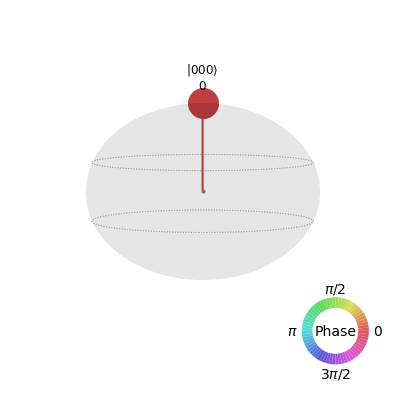

In [68]:
input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')
result = QuantumRegister(1, name='output')
constant = ClassicalRegister(1, name='constant')
qc = QuantumCircuit(input1, input2, result, constant)

qc.h(result)
qc.cswap(result, input1, input2)
qc.h(result)
qc.measure(result, constant)

results = work(qc)
print('Result: {0}'.format(list(results[0].keys())[0]))
print(qc.draw())
plot_state_qsphere(results[1], show_state_phases=True)

In the below image when we can see what happens when the bits are unequal and where the phase kickback effect comes into play in the test. We can see that |010> and |001> both have phases of 0, as well as |101>, however, |110> has a phase of pi, it is this phase difference which induces the control bit to become a 1 when the HAD operation is undone. Likewise if *input1* and *input2* were swapped around it would be |101> which had the different phase value to the other 3. Now more accurate and consolidated explanations are available with the use of mathematics so if you are interested I would recommend looking into that, but suffice to say here that *it just works*. 

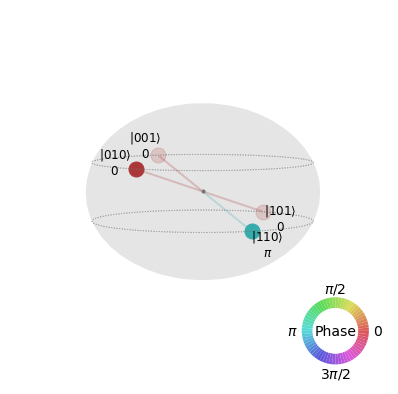

In [69]:
input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')
result = QuantumRegister(1, name='output')
constant = ClassicalRegister(1, name='constant')
qc = QuantumCircuit(input1, input2, result, constant)
qc.x(input1)
qc.h(result)
qc.cswap(result, input1, input2)
qc.h(result)
plot_state_qsphere(work(qc)[1], show_state_phases=True)

As we can see one test on its own is hardly ironclad, however, if run multiple times the chance of a false positive for both bits being equal will reduce. If a 1 is output at any point we know that the bits are not of the same value, therefore if this test is run 15 times the probability of the bits being unequal and us believing that they are the same is 0.5<sup>15</sup> which is equal to 0.0000305175781 and will reduce further the more the test is run.

## 7. A Less Random Qubit
Here we are going to see how to control the probability of whether we get a 0/1 from a qubit in a state of equal superposition. First we create 2 qubits and the 2 normal bits needed to measure them later on, then we run qubit *$\alpha$* through a HAD gate to place it in a state of equal superposition.

In [219]:
a = QuantumRegister(1, name='alpha')
b = QuantumRegister(1, name='beta')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

qc.h(a)

Next we work on qubit *$\beta$*, we run it through a HAD gate, a z-axis phase rotation gate with an angle of $\pi/4$, back through another HAD gate, and finally next we put *$\beta$* though a CNOT gate using *$\alpha$* as a control. The altered phase produces a strange effect, which is that when entangled with another qubit (in this case the qubits are entangled via the CNOT gate) once either of the qubits is read the remaining qubit will have its probability distribution altered.  

In [220]:
qc.h(b)
qc.rz(math.pi/4, b)
qc.h(b)

qc.cx(a, b)

In [221]:
qc.barrier()
qc.measure(a, a_c)
qc.barrier()
qc.measure(b, b_c)

print(work(qc)[0])
print(qc.draw())

{'1 1': 1}
         ┌───┐                       ░ ┌─┐ ░    
alpha_0: ┤ H ├───────────────────■───░─┤M├─░────
         ├───┤┌──────────┐┌───┐┌─┴─┐ ░ └╥┘ ░ ┌─┐
 beta_0: ┤ H ├┤ RZ(pi/4) ├┤ H ├┤ X ├─░──╫──░─┤M├
         └───┘└──────────┘└───┘└───┘ ░  ║  ░ └╥┘
   ac: 1/═══════════════════════════════╩═════╬═
                                        0     ║ 
                                              ║ 
   bc: 1/═════════════════════════════════════╩═
                                              0 


The distributions are altered as follows: the 1st qubit read has the standard 0/1, 50/50 split, however, the 2nd qubit has a 85% chance to be whatever value wasn't taken by the 1st, for example if the 1st was 1 the 2nd has a 85% chance to be 0. This allows us to control the randomness of the qubits somewhat even when in a state of superposition. Changing the angle of rotation in the z-axis will also change the probability distribution for example I've found that a rotation of $\pi/5$ leads to a distribution of about 90/10 for the 2nd qubit being the same as the 1st, while as a rotation of $\pi/3$ causes a distribution of about 75/25. For more an introduction into the reason these phenomenon occur, see some of the maths behind the z-axis phase rotation: http://www.vcpc.univie.ac.at/~ian/hotlist/qc/talks/bloch-sphere-rotations.pdf, and if you're not convinced about the probabilities I've made a small test down below.

In [152]:
on = 0
for i in range(0, 2000):
    results = work(qc)
    if list(results[0].keys())[0].split()[0] == '0':
        if list(results[0].keys())[0].split()[1] == '0':
            on += 1
    else:
        if list(results[0].keys())[0].split()[1] == '1':
            on += 1
print(str((on/2000)*100)+'%')

85.8%


# 8. Quantum Teleportation
Here we will begin to look at the weird and wonderful world of quantum teleportation with a continuation of the adventures of Jim and Tim. Even with their communication connection newly secured with quantum encryption, Jim and Tim do not feel entirely safe from the nefarious machinations of spies. Naturally they decided that the only way to safely send the information they need is to teleport it from one end to the other instantaneously with absolutely no possibility of interception. As always, they begin with establishing their circuit.

In [349]:
jim = QuantumRegister(1, name='jim')
transmission    = QuantumRegister(1, name='transmission')
tim   = QuantumRegister(1, name='tim')
jim_measure = ClassicalRegister(1, name='jimm')
transmission_measure    = ClassicalRegister(1, name='transmissionm')
tim_measure   = ClassicalRegister(1, name='timm')
qc = QuantumCircuit(jim, transmission, tim, jim_measure, transmission_measure, tim_measure)

Next up, we entangle the transmission qubit and Tim's receiving qubit using the standard HAD gate, CNOT gate combination.

In [350]:
qc.h(transmission)
qc.cx(transmission, tim)
qc.barrier()

Next we perform some preparatory operations on Jim's qubit to differentiate it so we can check that all quantum information about the qubit has been transmitted. (In an actual program this may be some sort of operation you want to use the qubit in before you return it to its original state)

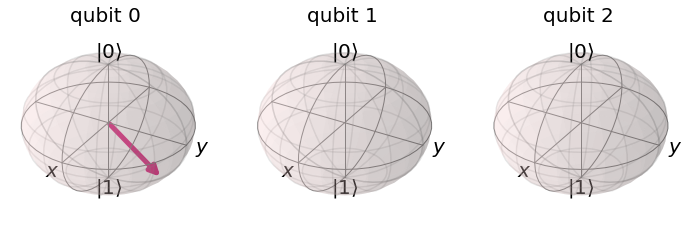

In [351]:
qc.h(jim)
qc.rz(math.radians(45), jim)
qc.h(jim)
plot_bloch_multivector(work(qc)[1])

Next Jim entangles his information qubit and the transmission qubit so now they have a 3 qubit jumble, then Jim measures his qubit and the transmission qubit essentially removing them from said jumble. 

In [352]:
qc.cx(jim, transmission)
qc.h(jim)
qc.measure(jim, jim_measure)
qc.measure(transmission, transmission_measure)
qc.barrier()

Now using the values received from the measurements Tim runs his qubit through a CNOT gate and a CZ gate (also known as a phase flip gate) and as you can see in the diagram *qubit 2* a.k.a Tim's qubit is now exactly the same as Jim's qubit was after his operations.

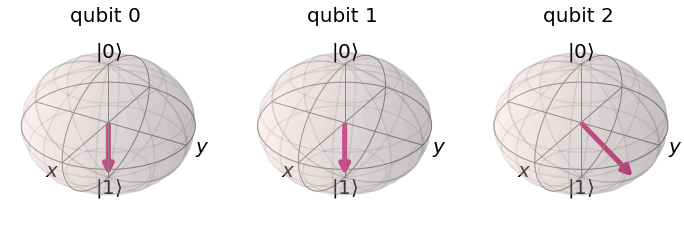

In [353]:
qc.cx(transmission, tim)
qc.cz(jim, tim)
plot_bloch_multivector(work(qc)[1])

Finally, to prove that we can get back to Jim's initial state Tim runs his qubit though the reverse of Jim's operations. 

In [354]:
qc.h(tim)
qc.rz(math.radians(-45), tim)
qc.h(tim)
qc.measure(tim, tim_measure)
print("Tim's qubit value: {0}".format(list(work(qc)[0].keys())[0][0]))
qc.draw()

Tim's qubit: 1


░ ┌───┐┌───┐┌──────────┐┌───┐     ┌───┐┌─┐ ░      »
          jim_0: ───────────░─┤ X ├┤ H ├┤ RZ(pi/4) ├┤ H ├──■──┤ H ├┤M├─░──────»
                 ┌───┐      ░ └───┘└───┘└──────────┘└───┘┌─┴─┐└┬─┬┘└╥┘ ░      »
 transmission_0: ┤ H ├──■───░────────────────────────────┤ X ├─┤M├──╫──░───■──»
                 └───┘┌─┴─┐ ░                            └───┘ └╥┘  ║  ░ ┌─┴─┐»
          tim_0: ─────┤ X ├─░───────────────────────────────────╫───╫──░─┤ X ├»
                      └───┘ ░                                   ║   ║  ░ └───┘»
         jimm: 1/═══════════════════════════════════════════════╬═══╩═════════»
                                                                ║   0         »
transmissionm: 1/═══════════════════════════════════════════════╩═════════════»
                                                                0             »
         timm: 1/═════════════════════════════════════════════════════════════»
                                                                              »
«                                              
«          jim_0: ─■───────────────────────────
«                  │                           
« transmission_0: ─┼───────────────────────────
«                  │ ┌───┐┌───────────┐┌───┐┌─┐
«          tim_0: ─■─┤ H ├┤ RZ(-pi/4) ├┤ H ├┤M├
«                    └───┘└───────────┘└───┘└╥┘
«         jimm: 1/═══════════════════════════╬═
«                                            ║ 
«transmissionm: 1/═══════════════════════════╬═
«                                            ║ 
«         timm: 1/═══════════════════════════╩═
«                                            0

Now you may notice some problems in this method:
1. Jim still needs to send Tim some information so he knows what operations to perform as they will be working on separate machines.
2. Tim will need to input this information on his end and unfortunately qubits are not nice enough to wait around for user inputs.
3. This is program is run in a simulator and does not account for any error found in working with real qubits.

These are all valid concerns, however, in regard to the 1st, yes Jim does still need to send information to Tim but this is just 2 0/1's that can retrieve the state of a qubit with a huge amount of information not found in a regular bit and even if intercepted there is pretty much nothing anyone could gleam from this information. To address this 2nd concern we use post-selection, essentially we have Tim perform all of the operations and save all the results and then just use the ones we can confirm as correct after the fact. Finally the 3rd concern, this is also true and hence needs to be performed many times in order to guarantee the correct result see section 5 here for information on running this code on one of IBM's QPUs: https://qiskit.org/textbook/ch-algorithms/teleportation.html